# GoogLeNet (Inception v3)

In [4]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3, decode_predictions

inceptionv3 = InceptionV3(input_shape=(299,299,3))
# inceptionv3.summary()

In [6]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
_______________________________________________________________________________________

In [2]:
import numpy as np
import cv2
import time 

img = cv2.imread('images/bird2.jpg', -1)
img = cv2.resize(img, (299, 299))

start = time.time() 
yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))
time = time.time() - start
# label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]

테스트 시 소요 시간 : 2.6216790676116943
web_site (71.99%)


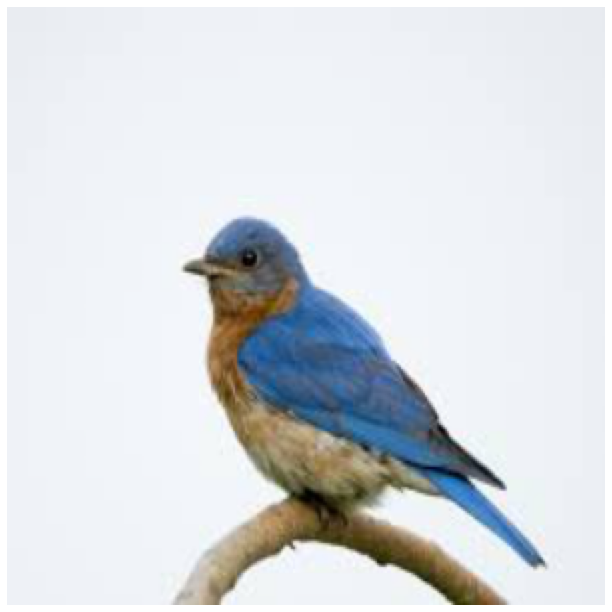

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()